In [1]:
# In this we do cleaning , feature_engineering ,EDA and preparing to ready the data for model training

# Problem_Statement
 A retail company "ABC pvt.ltd" want to understand the customer purchase behaviour
(specifically->purchase_amount) against various product of diff categories.
They have shared purchased summary of various customers for selected high volume product from last month
The dataset also contains customers demographics(age,gender,marital_status,city,type),
product_details(product_id and category) and total purchase amount from last month

Now,they want to build a model to predict thr purchase amount of customer against various products
which will help them to create personalized offer for customers against diff products

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df1 = pd.read_csv("train.csv")
df1.head(3)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [4]:
df2 = pd.read_csv("test.csv")
df2.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [5]:
#merge both datasets
#pd.merge()
#also using append but append merge it by rows not like this - + - = -- its doing like this,|+|=|
#                                                                                             |
df = df1.append(df2)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
#axis = 1 --> vertically(col wise)
#axis = 0 --> horizontally(row wise)
#and inplace automatically update it on dataset
df.drop(['User_ID'],axis = 1,inplace = True)

In [9]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
# pre-Processing

In [11]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

<AxesSubplot:>

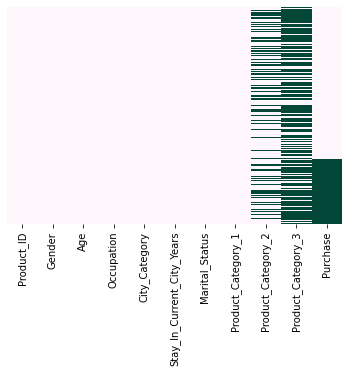

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="PuBuGn")

In [13]:
#df["Gender"] = pd.get_dummies(df["Gender"])
#the problem is tha we have to add one more column and drop gender col
# Why don't we do something in whcih we change F to 0 and M to 1

In [14]:
# here i handle categorical feature
df["Gender"] = df["Gender"].map({"F":0,"M":1})

In [15]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [16]:
#here i handle categorical feature
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
#df["Age"] =
#pd.get_dummies(df["Age"],drop_first=True) This is not a good practice
#for that type of data domain knowledge is most imp


In [18]:
#here i do target ordinal incoding
df["Age"] = df["Age"].map({'0-17':1 ,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7})

In [19]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [20]:
# #also done by label encoding
# # Import label encoder
# from sklearn import preprocessing

# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'species'.
# df['Age']= label_encoder.fit_transform(df['Age'])

# df['Age'].unique()


In [21]:
#fixing categorical col-->City_Category
df_city= pd.get_dummies(df["City_Category"],drop_first = True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [22]:
df = pd.concat([df,df_city],axis=1)


In [23]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [24]:
df.drop("City_Category",axis=1,inplace = True)

In [25]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [26]:
#focus on replacing missing values
df["Product_Category_2"].unique()
#its a discreet value so i use mode to replace missing values not mean bcz it creates a new category together

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [28]:
df["Product_Category_2"].mode()[0]

8.0

In [29]:
#Replace missing values with mode
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"]).mode()[0]

In [30]:
df["Product_Category_2"].isnull().sum()

0

In [31]:
#also for category 3
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [32]:
df["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [33]:
df["Product_Category_3"].mode()[0]

16.0

In [34]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"]).mode()[0]

In [35]:
df["Product_Category_3"].isnull().sum()

0

In [36]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [37]:
df.shape

(783667, 12)

In [38]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+","")

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_10232/2641274399.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+","")


<AxesSubplot:>

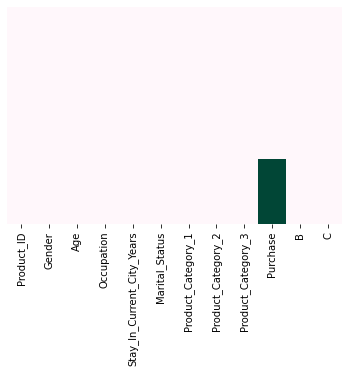

In [40]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="PuBuGn")


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [42]:
#Converting obj into int
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

In [44]:
df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)